In [1]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install numpy==1.19.5
!pip install wget==3.2
!pip install tensorflow==1.14.0

# ===========================

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.8 MB 4.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=821c49b3c5714865a37b98fe5568c34ade9507c9cd821d6c28467a08bac75e62
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 1.1 MB/s 
     |████████████████████████████████| 3.1 MB 43.7 MB/s 
     |████████████████████████████████| 488 kB 55.0 MB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import numpy as np
import tarfile
import wget
import warnings
warnings.filterwarnings("ignore") 
from zipfile import ZipFile

In [3]:
df = pd.read_csv('cyberbullying_upd.csv',encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [4]:
df.cyberbullying_type.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

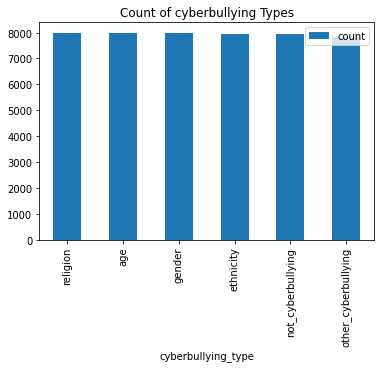

In [5]:
bull_count=pd.DataFrame(df['cyberbullying_type'].value_counts().sort_values(ascending=False))
bull_count.rename(columns={"cyberbullying_type":"count"},inplace=True)
bull_count
bull_count['cyberbullying_type']=['religion','age','gender','ethnicity','not_cyberbullying','other_cyberbullying']
bull_count.plot.bar(x="cyberbullying_type", y="count", title="Count of cyberbullying Types");

In [6]:
import re
import nltk
nltk.download('stopwords') #used for stopwords removal
nltk.download('wordnet') #used for getting synonyms of words
nltk.download('punkt') #used for tokenisation of words
nltk.download('averaged_perceptron_tagger') #used for tagging words with POS
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [7]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['tweet_text'] = df['tweet_text'].apply(clean_text)
df['tweet_text'] = df['tweet_text'].str.replace('\d+', '')

In [8]:
def print_plot(index):
    example = df[df.index == index][['tweet_text', 'cyberbullying_type']].values[0]
    if len(example) > 0:
        print(example[0])
        print('cyberbullying_type:', example[1])
print_plot(10)

dont care country come long willing assimilate american culture maybe whatever shithole country ted came said acceptable america better call female coworker fucking bitch
cyberbullying_type: gender


In [9]:
print_plot(100)

politicalant lithobolos zaibatsunews isis beheads prophet beheaded isis rapes slaves prophet raped
cyberbullying_type: religion


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each tweets.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['tweet_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 61967 unique tokens.


In [10]:
X = tokenizer.texts_to_sequences(df['tweet_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (47692, 250)


In [11]:
Y = pd.get_dummies(df['cyberbullying_type']).values
#Y = pd.get_dummies(df,columns=['category'])
print('Shape of label tensor:', Y.shape)
print([sum(x) for x in zip(*Y)])

Shape of label tensor: (47692, 6)
[7992, 7961, 7973, 7945, 7823, 7998]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.4, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(28615, 250) (28615, 6)
(19077, 250) (19077, 6)


**Setting the paths for external dataset glove for pre-trained embedding**

In [13]:
%%capture
try:
    
    from google.colab import files
    
    !wget -P DATAPATH http://nlp.stanford.edu/data/glove.6B.zip
    !unzip DATAPATH/glove.6B.zip -d DATAPATH/glove.6B
    
    !wget -P DATAPATH http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    !tar -xvf DATAPATH/aclImdb_v1.tar.gz -C DATAPATH
    
    BASE_DIR = 'DATAPATH'
    
except ModuleNotFoundError:
    
    if not os.path.exists('Data/glove.6B'):
        os.mkdir('Data/glove.6B')
        
        url='http://nlp.stanford.edu/data/glove.6B.zip'  
        wget.download(url,'Data')  
  
        temp='Data/glove.6B.zip' 
        file = ZipFile(temp)  
        file.extractall('Data/glove.6B') 
        file.close()
        
        
        
    if not os.path.exists('Data/aclImdb'):
        
        url='http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz' 
        wget.download(url,'Data')
        
        temp='Data/aclImdb_v1.tar.gz' 
        tar = tarfile.open(temp, "r:gz")
        tar.extractall('Data')      
        tar.close()
    
    BASE_DIR = 'Data'

In [14]:
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')
TRAIN_DATA_DIR = os.path.join(BASE_DIR, 'aclImdb/train')
TEST_DATA_DIR = os.path.join(BASE_DIR, 'aclImdb/test')

In [15]:
print('Preparing embedding matrix.')

# first, build index mapping words in the embeddings set
# to their embedding vector
embeddings_index = {}
with open(os.path.join(GLOVE_DIR, 'glove.6B.100d.txt'),encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors in Glove embeddings.' % len(embeddings_index))
#print(embeddings_index["google"])

# prepare embedding matrix - rows are the words from word_index, columns are the embeddings of that word from glove.
num_words = min(MAX_NB_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NB_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load these pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)
print("Preparing of embedding matrix is done")

Preparing embedding matrix.
Found 400000 word vectors in Glove embeddings.
Preparing of embedding matrix is done



**LSTM With own Embedding**

In [37]:
model1 = Sequential()
model1.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model1.add(SpatialDropout1D(0.2))
model1.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(6, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 128

history = model1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 25753 samples, validate on 2862 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
25753/25753 [==============================] - 175s 7ms/sample - loss: 0.8662 - acc: 0.6512 - val_loss: 0.4697 - val_acc: 0.7935
Epoch 2/5
25753/25753 [==============================] - 165s 6ms/sample - loss: 0.3842 - acc: 0.8380 - val_loss: 0.4415 - val_acc: 0.8197
Epoch 3/5
25753/25753 [==============================] - 163s 6ms/sample - loss: 0.2638 - acc: 0.8983 - val_loss: 0.4586 - val_acc: 0.8187
Epoch 4/5
25753/25753 [==============================] - 162s 6ms/sample - loss: 0.1839 - acc: 0.9309 - val_loss: 0.5266 - val_acc: 0.8124
Epoch 5/5
25753/25753 [==============================] - 163s 6ms/sample - loss: 0.1365 - acc: 0.9467 - val_loss: 0.5994 - val_acc: 0.8120


In [39]:
accr = model1.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

19077/19077 [==============================] - 57s 3ms/sample - loss: 0.5558 - acc: 0.8165
Test set
  Loss: 0.556
  Accuracy: 0.816


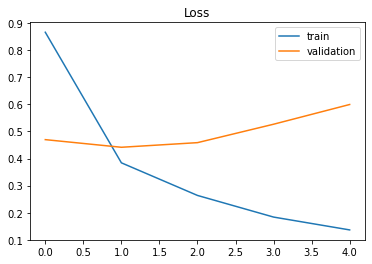

In [40]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

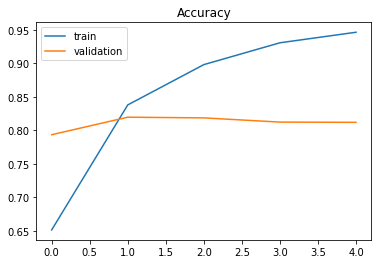

In [41]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show();

**LSTM With pre-trained Embedding**

In [16]:
model = Sequential()
model.add(embedding_layer)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 128

history= model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 25753 samples, validate on 2862 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
25753/25753 [==============================] - 167s 6ms/sample - loss: 0.8581 - acc: 0.6718 - val_loss: 0.5754 - val_acc: 0.7645
Epoch 2/5
25753/25753 [==============================] - 164s 6ms/sample - loss: 0.5810 - acc: 0.7675 - val_loss: 0.5144 - val_acc: 0.7834
Epoch 3/5
25753/25753 [==============================] - 164s 6ms/sample - loss: 0.5228 - acc: 0.7873 - val_loss: 0.4951 - val_acc: 0.7932
Epoch 4/5
25753/25753 [==============================] - 168s 7ms/sample - loss: 0.4941 - acc: 0.8000 - val_loss: 0.4771 - val_acc: 0.7935
Epoch 5/5
25753/25753 [==============================] - 170s 7ms/sample - loss: 0.4706 - acc: 0.8105 - val_loss: 0.4662 - val_acc: 0.7991


In [17]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

19077/19077 [==============================] - 44s 2ms/sample - loss: 0.4529 - acc: 0.8129
Test set
  Loss: 0.453
  Accuracy: 0.813


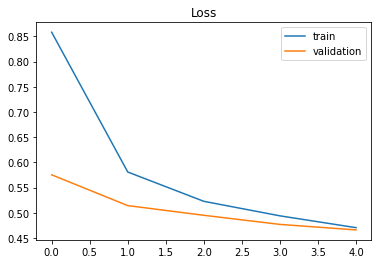

In [18]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

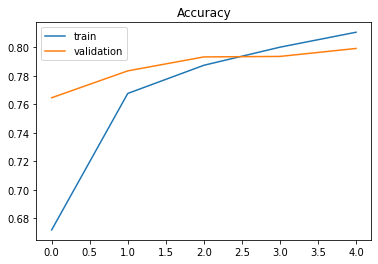

In [19]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show();

**CNN Model**

**With Own Embedding**

In [33]:
print("Defining and training a CNN model, training with own embedding")
cnnmodel = Sequential()
cnnmodel.add(Embedding(MAX_NB_WORDS, 128))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(MaxPooling1D(5))
cnnmodel.add(Conv1D(128, 5, activation='relu'))
cnnmodel.add(GlobalMaxPooling1D())
cnnmodel.add(Dense(128, activation='relu'))
cnnmodel.add(Dense(6, activation='softmax'))

cnnmodel.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
#cnnmodel.summary()
#Train the model. Tune to validation set. 

history= cnnmodel.fit(X_train, Y_train, epochs=5, batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])




Defining and training a CNN model, training with own embedding
Train on 32192 samples, validate on 3577 samples
Epoch 1/5
32192/32192 [==============================] - 102s 3ms/sample - loss: 0.6695 - acc: 0.7087 - val_loss: 0.4743 - val_acc: 0.7875
Epoch 2/5
32192/32192 [==============================] - 93s 3ms/sample - loss: 0.4230 - acc: 0.8276 - val_loss: 0.4694 - val_acc: 0.8046
Epoch 3/5
32192/32192 [==============================] - 94s 3ms/sample - loss: 0.3386 - acc: 0.8692 - val_loss: 0.4629 - val_acc: 0.8130
Epoch 4/5
32192/32192 [==============================] - 93s 3ms/sample - loss: 0.2704 - acc: 0.8979 - val_loss: 0.5013 - val_acc: 0.8124
Epoch 5/5
32192/32192 [==============================] - 92s 3ms/sample - loss: 0.2129 - acc: 0.9204 - val_loss: 0.5499 - val_acc: 0.8105


In [22]:
accr = cnnmodel.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

11923/11923 [==============================] - 7s 570us/sample - loss: 0.5676 - acc: 0.8053
Test set
  Loss: 0.568
  Accuracy: 0.805


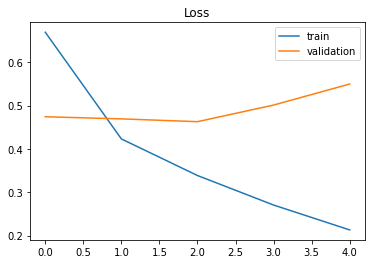

In [34]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

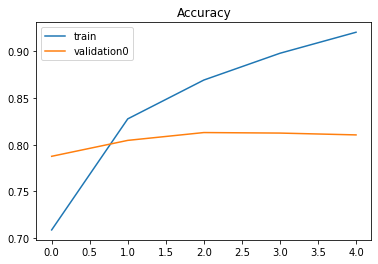

In [35]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation0')
plt.legend()
plt.show();

**With-pre trained embedding**

In [29]:
print("Defining and training a CNN model, training with pre-trained embedding")
cnnmodele = Sequential()
cnnmodele.add(embedding_layer)
cnnmodele.add(Conv1D(128, 5, activation='relu'))
cnnmodele.add(MaxPooling1D(5))
cnnmodele.add(Conv1D(128, 5, activation='relu'))
cnnmodele.add(MaxPooling1D(5))
cnnmodele.add(Conv1D(128, 5, activation='relu'))
cnnmodele.add(GlobalMaxPooling1D())
cnnmodele.add(Dense(128, activation='relu'))
cnnmodele.add(Dense(6, activation='softmax'))

cnnmodele.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

#Train the model. Tune to validation set. 

history = cnnmodele.fit(X_train, Y_train, epochs=5, batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Defining and training a CNN model, training with pre-trained embedding
Train on 32192 samples, validate on 3577 samples
Epoch 1/5
32192/32192 [==============================] - 52s 2ms/sample - loss: 0.6512 - acc: 0.7269 - val_loss: 0.5111 - val_acc: 0.7842
Epoch 2/5
32192/32192 [==============================] - 58s 2ms/sample - loss: 0.4657 - acc: 0.8045 - val_loss: 0.5697 - val_acc: 0.7783
Epoch 3/5
32192/32192 [==============================] - 51s 2ms/sample - loss: 0.4050 - acc: 0.8298 - val_loss: 0.4900 - val_acc: 0.7959
Epoch 4/5
32192/32192 [==============================] - 52s 2ms/sample - loss: 0.3543 - acc: 0.8494 - val_loss: 0.5301 - val_acc: 0.7920
Epoch 5/5
32192/32192 [==============================] - 51s 2ms/sample - loss: 0.3161 - acc: 0.8669 - val_loss: 0.6085 - val_acc: 0.7861


In [30]:
accr = cnnmodele.evaluate(X_test,Y_test)
print(accr)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

11923/11923 [==============================] - 9s 740us/sample - loss: 0.5989 - acc: 0.7876
[0.5988994807937267, 0.78763735]
Test set
  Loss: 0.599
  Accuracy: 0.788


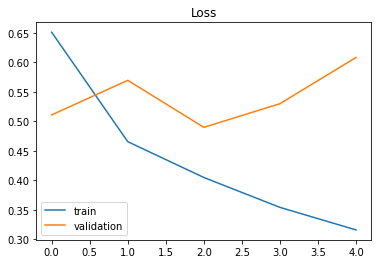

In [31]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

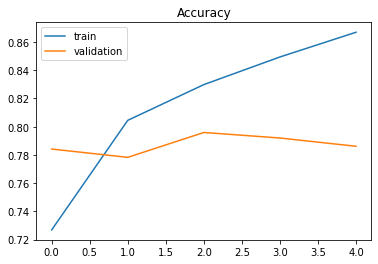

In [32]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='validation')
plt.legend()
plt.show();

**Texting with some new data**

In [21]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [31]:
val = input("Enter the tweet: ")
new_tweet=val
clean_text(new_tweet)
scores=sid.polarity_scores(val)
print(new_tweet)
print("The level of toxicity is: ",scores['neg'])
new_tweet=[new_tweet]
seq = tokenizer.texts_to_sequences(new_tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels=['Age','Ethnicity','Gender','Not_Cb','Other','religion']
#print(pred, labels[np.argmax(pred)])
print("The category of cyber bullying is: ", labels[np.argmax(pred)])

Enter the tweet: love all people
love all people
The level of toxicity is:  0.0
The category of cyber bullying is:  Not_Cb


In [ ]:
val = input("Enter the tweet: ")
new_tweet=val
clean_text(new_tweet)
scores=sid.polarity_scores(val)
print(new_tweet)
print("The level of toxicity is: ",scores['neg'])
new_tweet=[new_tweet]
seq = tokenizer.texts_to_sequences(new_tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels=['Age','Ethnicity','Gender','Not_Cb','Other','religion']
#print(pred, labels[np.argmax(pred)])
print("The category of cyber bullying is: ", labels[np.argmax(pred)])

Enter the tweet: Christians are bad people
Christians are bad people
The level of toxicity is:  0.538
The category of cyber bullying is:  religion


In [ ]:
val = input("Enter the tweet: ")
new_tweet=val
clean_text(new_tweet)
scores=sid.polarity_scores(val)
print(new_tweet)
print("The level of toxicity is: ",scores['neg'])
new_tweet=[new_tweet]
seq = tokenizer.texts_to_sequences(new_tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels=['Age','Ethnicity','Gender','Not_Cb','Other','religion']
#print(pred, labels[np.argmax(pred)])
print("The category of cyber bullying is: ", labels[np.argmax(pred)])

Enter the tweet: Dumb black people
Dumb black people
The level of toxicity is:  0.623
The category of cyber bullying is:  Ethnicity


In [ ]:
val = input("Enter the tweet: ")
new_tweet=val
clean_text(new_tweet)
scores=sid.polarity_scores(val)
print(new_tweet)
print("The level of toxicity is: ",scores['neg'])
new_tweet=[new_tweet]
seq = tokenizer.texts_to_sequences(new_tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels=['Age','Ethnicity','Gender','Not_Cb','Other','religion']
#print(pred, labels[np.argmax(pred)])
print("The category of cyber bullying is: ", labels[np.argmax(pred)])

Enter the tweet: Gay people are dumb
Gay people are dumb
The level of toxicity is:  0.524
The category of cyber bullying is:  Gender


In [ ]:
val = input("Enter the tweet: ")
new_tweet=val
clean_text(new_tweet)
scores=sid.polarity_scores(val)
print(new_tweet)
print("The level of toxicity is: ",scores['neg'])
new_tweet=[new_tweet]
seq = tokenizer.texts_to_sequences(new_tweet)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels=['Age','Ethnicity','Gender','Not_Cb','Other','religion']
#print(pred, labels[np.argmax(pred)])
print("The category of cyber bullying is: ", labels[np.argmax(pred)])

Enter the tweet: Love all people
Love all people
The level of toxicity is:  0.0
The category of cyber bullying is:  Not_Cb
